In [30]:
#imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [31]:
#definir os caminhos 
#definir train_dir test_dir valid_dir

train_dir = 'C:\\Users\\rafin\\OneDrive\\Área de Trabalho\\trabalho de deep\\train'
test_dir = 'C:\\Users\\rafin\OneDrive\\Área de Trabalho\\trabalho de deep\\test'
valid_dir = 'C:\\Users\\rafin\\OneDrive\\Área de Trabalho\\trabalho de deep\\valid'

In [32]:
# aqui ta normalizando 
img_width, img_height = 96, 96

In [33]:
# Definir tamanho do lote
batch_size = 128




In [34]:
# Gerar dados de treinamento
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

In [35]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 66378 images belonging to 515 classes.


In [36]:
# Gerar dados de validação
valid_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 16346 images belonging to 515 classes.


In [37]:
# Gerar dados de teste
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 2575 images belonging to 515 classes.


In [38]:
# Construir a rede neural conv2d
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    #tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    #tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 256)     

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#dividir por 255
#colocar no kaggle para ver se roda
#do jjeito que está saimos de 5 para 2.5h
#usar o arquivo csv mais leve e com menos custo comp. 
#tentar rodar essa joça na maquina local msm 

In [40]:
# Treino
history = model.fit(train_generator, epochs=15, validation_data=valid_generator)

Epoch 1/15
267/519 [==============>...............] - ETA: 22:58 - loss: 6.7229 - accuracy: 0.0026

In [ ]:
#acuracia
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)
#print(history.history)

21/21 [==============================] - 63s 3s/step - loss: 6.2514 - accuracy: 0.0019
Test accuracy: 0.0019417476141825318


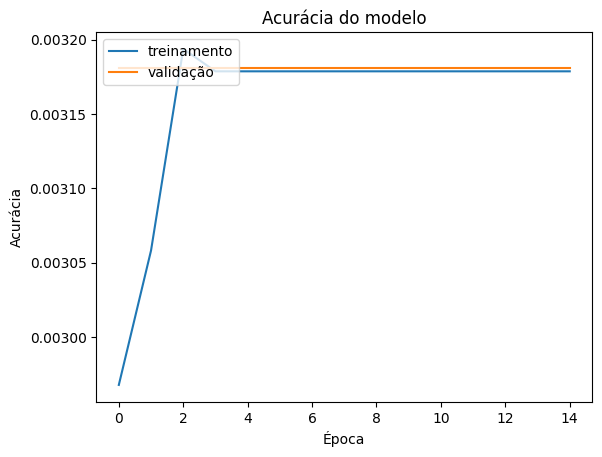

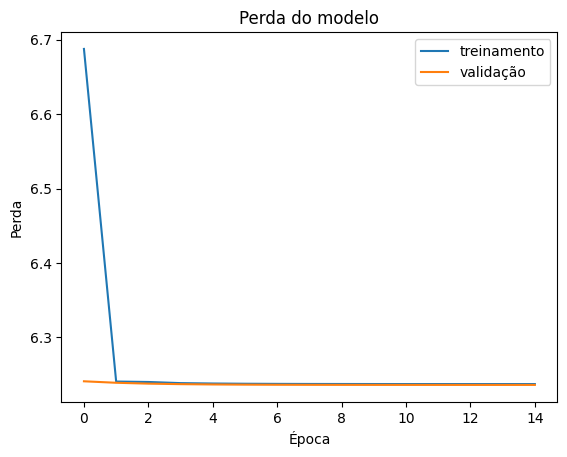

In [ ]:
# Plotar gráficos de acurácia e perda
#plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
#plt.legend(loc='lower right')
#plt.show()

# Plotar gráfico de acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()

# Plotar gráfico de perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper right')
plt.show()

In [ ]:
#import tensorflow as tf

# Verificar se a GPU está disponível
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0
